In [94]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

Documentation:

https://www.cosmos.esa.int/web/gaia-users/archive/datalink-products

## Create a list containing the GAIA IDs of the objects you are interested in:

In [125]:
#!pip install astroquery
from astroquery.gaia import GaiaClass
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define center coordinates and radius
#center_ra = 330.24404  # degrees
#center_dec = 25.58914   # degrees
center_ra = 203.50953 # degrees
center_dec = 53.76383   # degrees
radius = 0.002        # degrees

coord = SkyCoord(ra=center_ra, dec=center_dec, unit=(u.deg, u.deg))
gaiaobj = GaiaClass()
gaiaobj.ROW_LIMIT = 50000  # No limit on number of rows returned
job = gaiaobj.cone_search(coord, radius=radius * u.deg, verbose=False)
results = job.get_results()

starID = results['source_id'][(results['has_xp_sampled']) & (results['phot_g_mean_mag'] < 20) & (results['phot_g_mean_mag'] > 11)]

print(len(starID))

1


## Download the spectra:

In [126]:
retrieval_type = 'XP_SAMPLED'     # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'     # Options are: 'INDIVIDUAL' or 'RAW'
data_release   = 'Gaia DR3'       # Options are: 'Gaia DR3' (default), 'Gaia DR2'

datalink = gaiaobj.load_data(ids=starID,
                          data_release=data_release, 
                          retrieval_type=retrieval_type, 
                          data_structure=data_structure, 
                          format='votable',               
                          verbose=True,   
                          output_file='Gaia_spectra/', 
                          overwrite_output_file='True')

Retrieving data.
Data request: VALID_DATA=false&ID=1560420996561363712&RELEASE=Gaia+DR3&DATA_STRUCTURE=INDIVIDUAL&FORMAT=votable&RETRIEVAL_TYPE=XP_SAMPLED&USE_ZIP_ALWAYS=true
------>https
host = gea.esac.esa.int:443
context = /data-server/data
Content-type = application/x-www-form-urlencoded
200 200
Reading...
Done.


## Create a list containing the keys of the dictionary

In [127]:
dl_keys  = [inp for inp in datalink.keys()]

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * XP_SAMPLED-Gaia DR3 1560420996561363712.xml


## Extract wavelengths and fluxes

In [128]:
wavelengths = datalink[dl_keys[0]][0].to_table().as_array()['wavelength']
wavelengths = np.ma.getdata(wavelengths)

In [129]:
fluxes = datalink[dl_keys[0]][0].to_table().as_array()['flux']
fluxes = np.ma.getdata(fluxes)
fluxes

array([8.4050910e-16, 8.1917906e-16, 7.8850848e-16, 7.6051393e-16,
       7.5116311e-16, 7.4490264e-16, 7.3846900e-16, 7.3114730e-16,
       7.4913754e-16, 7.8456030e-16, 7.8248967e-16, 7.4975905e-16,
       7.3745664e-16, 7.3215289e-16, 7.4170287e-16, 7.8043011e-16,
       8.2956729e-16, 8.4764710e-16, 8.3373220e-16, 8.2496043e-16,
       8.4014207e-16, 8.7120557e-16, 8.8214119e-16, 8.6763554e-16,
       8.6448193e-16, 8.8151862e-16, 8.8466869e-16, 8.4716905e-16,
       7.9383806e-16, 7.7057086e-16, 8.1215541e-16, 9.1416708e-16,
       1.0361593e-15, 1.1369291e-15, 1.1856001e-15, 1.1912557e-15,
       1.1805228e-15, 1.1768628e-15, 1.1881670e-15, 1.2118154e-15,
       1.2282933e-15, 1.2277901e-15, 1.2094645e-15, 1.1798508e-15,
       1.1484435e-15, 1.1239541e-15, 1.1052401e-15, 1.0947812e-15,
       1.0918549e-15, 1.0967587e-15, 1.1135320e-15, 1.1437674e-15,
       1.1795589e-15, 1.2150429e-15, 1.2437112e-15, 1.2625360e-15,
       1.2717306e-15, 1.2740387e-15, 1.2747590e-15, 1.2775698e

In [130]:
fluxes_err = datalink[dl_keys[0]][0].to_table().as_array()['flux_error']
fluxes_err= np.ma.getdata(fluxes_err)
fluxes_err

array([5.40902038e-17, 3.97836916e-17, 3.25557444e-17, 2.76655172e-17,
       2.55718403e-17, 2.44647517e-17, 2.52857218e-17, 2.60728173e-17,
       2.85689357e-17, 2.96357373e-17, 2.86190959e-17, 2.50015721e-17,
       2.33197799e-17, 2.27749805e-17, 2.21860329e-17, 2.40699946e-17,
       2.38568716e-17, 2.66668653e-17, 2.67204782e-17, 2.85740245e-17,
       3.10944273e-17, 3.08883204e-17, 3.47285626e-17, 3.30527344e-17,
       3.24749421e-17, 3.17067461e-17, 2.69916131e-17, 2.57617742e-17,
       2.30561673e-17, 2.01243729e-17, 1.97446126e-17, 1.80745118e-17,
       1.68842634e-17, 1.69954183e-17, 1.59587459e-17, 1.54433859e-17,
       1.57579230e-17, 1.50749167e-17, 1.46199624e-17, 1.50503577e-17,
       1.47221605e-17, 1.42442156e-17, 1.46588730e-17, 1.47148102e-17,
       1.41048340e-17, 1.40933825e-17, 1.43794844e-17, 1.40443257e-17,
       1.36415698e-17, 1.37996945e-17, 1.38609522e-17, 1.34736869e-17,
       1.32304826e-17, 1.33623368e-17, 1.32907237e-17, 1.29046520e-17,
      

In [131]:
#Read the spectrum in SDSSstars folder for comparison
sdss_data = fits.open('SDSSstars/spec_2035059_53.7638.fits')
flux = sdss_data[1].data['flux'] * 1e-17 * 0.01
lam = 10**sdss_data[1].data['loglam']
#interpolate to a linear wavelength grid
linlam = np.arange(7000)+3500
linflux = np.interp(linlam, lam, flux, left=0, right=0)
#trim negative fluxes
linlam = linlam[linflux>0]
linflux = linflux[linflux>0]
#go to nm
linlam = linlam / 10
#convolve with a gaussian kernel of sigma 4.24 nm to match GAIA resolution
from scipy.ndimage import gaussian_filter1d
convflux = gaussian_filter1d(linflux, sigma=30) #in pixels of 0.1 nm)

## Plot the spectrum

In [132]:
#query extinction calculator for the coordinates
from astroquery.ipac.irsa.irsa_dust import IrsaDust
from astropy.coordinates import SkyCoord
import astropy.units as u
coord = SkyCoord(ra=center_ra*u.deg, dec=center_dec*u.deg, frame='icrs')
dust_table = IrsaDust.get_query_table(coord, section='ebv')
ebv = dust_table['ext SFD mean'][0]
print(f'E(B-V) = {ebv}')

E(B-V) = 0.0156


In [140]:
#Milky way attenuation law
from dust_extinction.parameter_averages import CCM89
ext_model = CCM89(Rv=3.1)
#Correct fluxes for extinction
flux_unext = convflux / ext_model.extinguish(linlam * u.nm, Ebv=1.00*ebv)

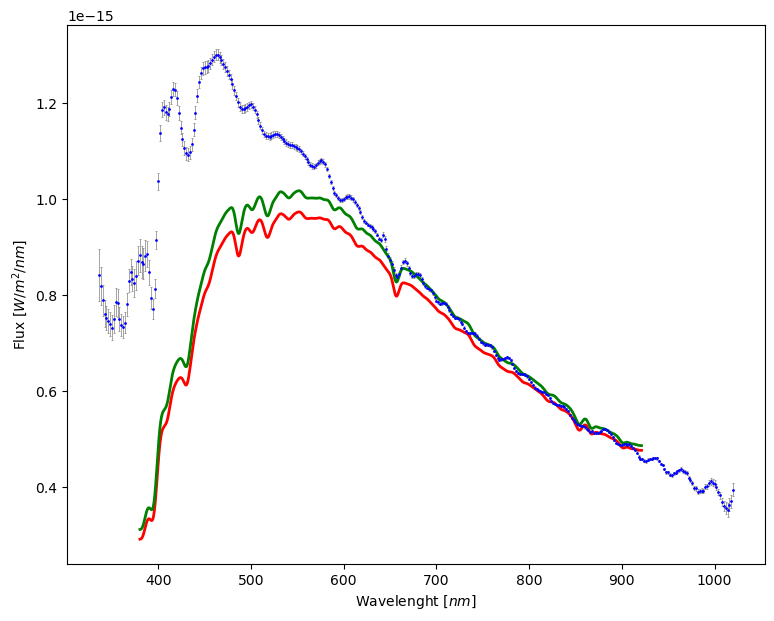

In [141]:
sdss_scalefac = 0.80
plt.figure(figsize=(9, 7))
plt.errorbar(wavelengths, fluxes, yerr=fluxes_err, fmt='o', ms=1, color='blue', ecolor='gray', elinewidth=0.5, capsize=1, capthick=0.5)
plt.plot(linlam, convflux*sdss_scalefac, color='red', lw=2)
plt.plot(linlam, flux_unext*sdss_scalefac, color='green', lw=2)
plt.xlabel('Wavelenght $[nm]$')
plt.ylabel('Flux $[W / m^2 / nm]$');